<a href="https://colab.research.google.com/github/Haewoonglee/audio_classification/blob/main/%EC%98%A4%EB%94%94%EC%98%A4_%EB%B6%84%EB%A5%98_%ED%95%B4%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오디오 분류(Audio Classification)

* 가상 악기를 활용해 악기별 음색 데이터셋을 활용해 오디오 분류

1. 기존 데이터에서 분류에 사용되는 방법을 사용해 분류
2. 오디오 데이터에 특화된 분류

* 출처: https://bab2min.tistory.com/642

### 데이터 준비 및 전처리

In [ ]:
import numpy as np
import itertools
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

* 데이터를 저장할 리스트와 파일을 불러올 경로를 지정

* https://s3.ap-northeast-2.amazonaws.com/suanlab.com/dataset/GeneralMidi.wav



In [ ]:
# 악기별로 종합되어 있는 미디 파일.
!wget https://s3.ap-northeast-2.amazonaws.com/suanlab.com/dataset/GeneralMidi.wav

--2021-04-29 02:57:40--  https://s3.ap-northeast-2.amazonaws.com/suanlab.com/dataset/GeneralMidi.wav
Resolving s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)... 52.219.56.89
Connecting to s3.ap-northeast-2.amazonaws.com (s3.ap-northeast-2.amazonaws.com)|52.219.56.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3409459756 (3.2G) [audio/wav]
Saving to: ‘GeneralMidi.wav’

GeneralMidi.wav     100%[===================>]   3.17G  16.4MB/s    in 3m 22s  

2021-04-29 03:01:02 (16.1 MB/s) - ‘GeneralMidi.wav’ saved [3409459756/3409459756]



In [ ]:
midi_file = '/content/GeneralMidi.wav'

* wmv 파일에는 128개 악기와 46개 타악기의 음을 50개씩 2초 간격으로 존재
* 해당 예제에서는 일부 악기만 선택해서 사용

In [ ]:
# 악기를 선택해서 가져오기
instruments = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
# 50개의 음 설정
num_notes = 50
# 2초 간격
sec = 2

# 저장할 리스트 만듬.
audio = []
inst = []

for inst_idx, note in itertools.product(range(len(instruments)), range(num_notes)):
    instrument = instruments[inst_idx]
    offset = (instrument*num_notes*sec) + (note*sec) # 해당하는 전체 길이에서 offset 구하기
    print("instrumnet: {}, note: {}, offset: {}".format(instrument, note, offset))
    y, sr = librosa.load(midi_file, sr=None, offset=offset, duration=2.0) # 2초 단위로 계속 파일을 불러서 저장.
    audio.append(y)
    inst.append(inst_idx) # 인덱스 값을 줘서 그 악기가 어떤 악기인지 구분만 할 수 있는 형태

instrumnet: 0, note: 0, offset: 0
instrumnet: 0, note: 1, offset: 2
instrumnet: 0, note: 2, offset: 4
instrumnet: 0, note: 3, offset: 6
instrumnet: 0, note: 4, offset: 8
instrumnet: 0, note: 5, offset: 10
instrumnet: 0, note: 6, offset: 12
instrumnet: 0, note: 7, offset: 14
instrumnet: 0, note: 8, offset: 16
instrumnet: 0, note: 9, offset: 18
instrumnet: 0, note: 10, offset: 20
instrumnet: 0, note: 11, offset: 22
instrumnet: 0, note: 12, offset: 24
instrumnet: 0, note: 13, offset: 26
instrumnet: 0, note: 14, offset: 28
instrumnet: 0, note: 15, offset: 30
instrumnet: 0, note: 16, offset: 32
instrumnet: 0, note: 17, offset: 34
instrumnet: 0, note: 18, offset: 36
instrumnet: 0, note: 19, offset: 38
instrumnet: 0, note: 20, offset: 40
instrumnet: 0, note: 21, offset: 42
instrumnet: 0, note: 22, offset: 44
instrumnet: 0, note: 23, offset: 46
instrumnet: 0, note: 24, offset: 48
instrumnet: 0, note: 25, offset: 50
instrumnet: 0, note: 26, offset: 52
instrumnet: 0, note: 27, offset: 54
instrum

- 악기당 50개씩만 존재한다 생각하고 가정.
- 악기하나당 50개의 음을 가지는 총 500개의 데이터

In [ ]:
# numpy 데이터로 변환
import numpy as np

audio_np = np.array(audio, np.float32)
inst_np = np.array(inst, np.int16)

print(audio_np.shape, inst_np.shape)

(500, 88200) (500,)


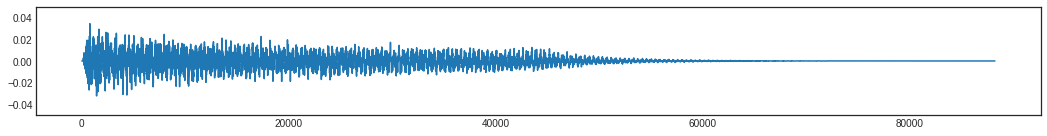

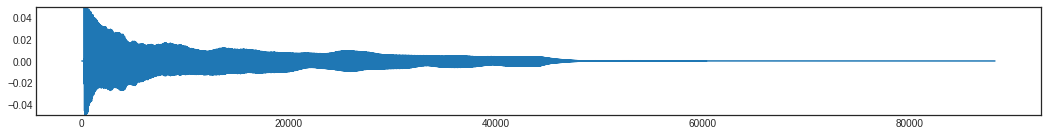

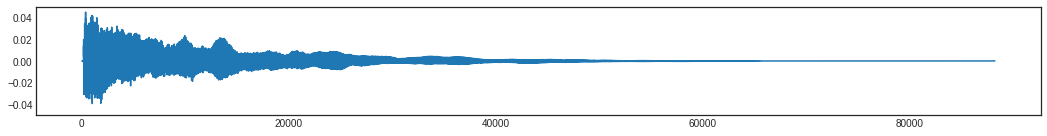

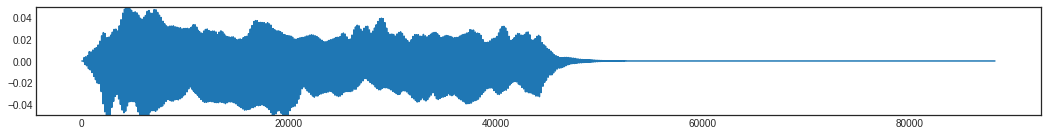

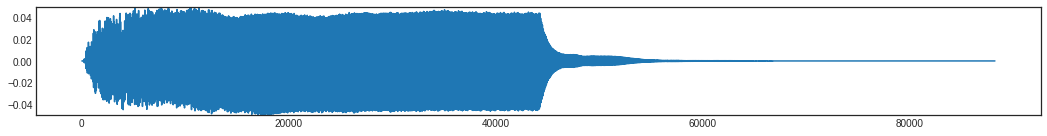

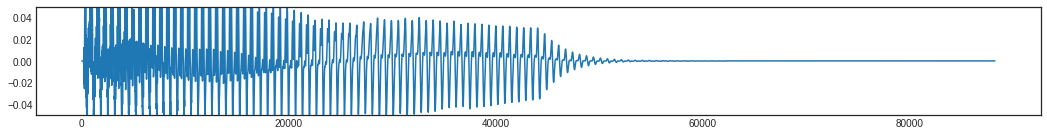

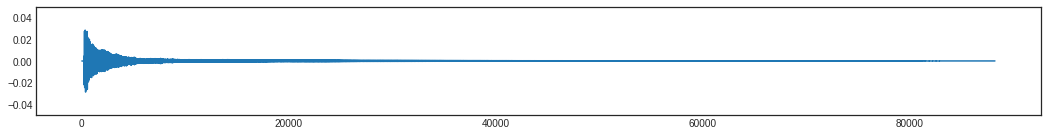

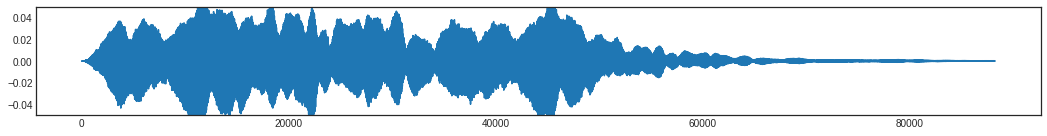

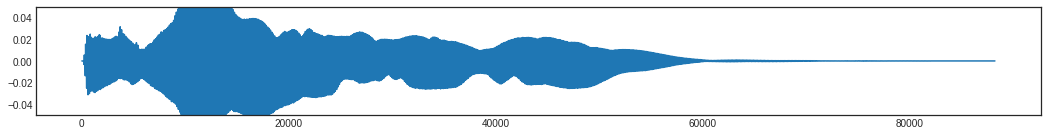

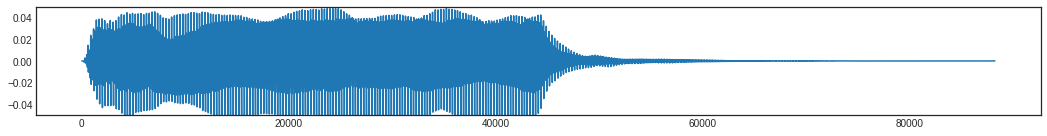

In [ ]:
# 우리가 사용하는 데이터가 어떤 데이터인지 확인
for idx in range(0, len(audio_np), num_notes):
    plt.figure(figsize=(18, 2))
    plt.plot(audio_np[idx])
    plt.ylim((-0.05, 0.05))
    plt.show()
# 500개 중에 50단위로 총 악기가 10개가 나옴.

- 악기의 종류에 따라서 waveform 자체가 조금씩 다른 것을 볼 수 있습니다.

In [ ]:
# 소리를 한번 들어봅시다.
# 0 ~ 49까지 1번째 악기가 저장
print(inst_np[0])
ipd.Audio(audio_np[0], rate=sr)

0


- 피아노인것 같습니다.

In [ ]:
# 50부터 2번째 악기
print(inst_np[50])
ipd.Audio(audio_np[50], rate=sr)

1


In [ ]:
# 100부터 3번째 악기
print(inst_np[100])
ipd.Audio(audio_np[100], rate=sr)

2


In [ ]:
# 150부터 4번째 악기
print(inst_np[150])
ipd.Audio(audio_np[150], rate=sr)

3


In [ ]:
# 200부터 5번째 악기
print(inst_np[200])
ipd.Audio(audio_np[200], rate=sr)

4


In [ ]:
# 250부터 6번째 악기
print(inst_np[250])
ipd.Audio(audio_np[250], rate=sr)

5


In [ ]:
# 300부터 7번째 악기
print(inst_np[300])
ipd.Audio(audio_np[300], rate=sr)

6


In [ ]:
# 350부터 8번째 악기
print(inst_np[350])
ipd.Audio(audio_np[350], rate=sr)

7


In [ ]:
# 400부터 9번째 악기
print(inst_np[400])
ipd.Audio(audio_np[400], rate=sr)

8


In [ ]:
# 450부터 10번째 악기
print(inst_np[450])
ipd.Audio(audio_np[450], rate=sr)

9


In [ ]:
# MinMaxScalar를 통해서 전처리

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(audio_np)

MinMaxScaler(copy=True, feature_range=(0, 1))

## 머신러닝을 이용한 오디오 분류

* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(audio_np, inst_np, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 88200)
(100, 88200)
(400,)
(100,)


### Logistic Regression

* Logistic Regression은 특성상 다중 분류에는 적합하지 않음
* 하지만 해보자.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.06


- 결과가 참담합니다. 구분을 거의 하지 못합니다.

### Support Vector Machine

- SVM은 그나마 좋지 않을까요? 기본적으로 분류에서 어느정도 성능이 나오지 않을까요?

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel = 'linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.07


### Decision Tree

- 분류에서 좋은 성능을 가지고 있는 의사결정 나무를 한번 사용해봅시다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.43


- 여전히 결과가 좋지 않습니다. 그렇다면 왜? 이런 결과가 나온 것일까요?
- 일단은 데이터가 88200 입니다. 굉장히 길기 때문에 이런 긴 데이터 자체를 잘 처리하지 못하는 부분이 있어서 성능이 나오지 않습니다.
- 이에 오디오의 특징을 활용해 constant-Q를 이용해 분류를 해봅시다.

## Constant-Q를 이용한 머신러닝 오디오 분류

### 데이터 준비

* wav는 매 순간의 음압을 측정하여 그 수치를 저장한 형태이기 때문에 그 자체로 음악을 분석하기에 적합하지 않음 (음의 높이와 세기를 듣는것이지 순간의 음압을 듣는게 아니기 때문)
* 푸리에 변환과 같은 변환 기법을 이용하여 시간 축의 데이터를 주파수 축의 데이터로 바꿔줘야할 필요가 있음
* 푸리에 변환 대신 푸리에 변환과 유사한 Constant-Q 변환을 사용
* Constant-Q 변환은 주파수 축이 로그 단위로 변환되고, 각 주파수에 따라 해상도가 다양하게 처리되기 때문에(저주파는 저해상도, 고주파는 고해상도) 음악을 처리하는 데에 푸리에 변환보다 유리

*   주파수 대역을 저장할 리스트 `audio_cqt` 선언
*   constant-Q 변환할 때는 변환할 오디오 데이터와 sampling rate가 필요
*   해당 데이터에서는 sampling rate가 모두 동일하므로 따로 처리가 필요하지 않음
*   여기서는 Constant-Q 변환을 사용해 오디오 데이터를 주파수 대역으로 변환




*   변환에는 앞서 준비한 데이터를 가져와 사용하며, Constant-Q 변환에는 `librosa.cqt` 함수를 사용
*   여기서 `n_bins`는 옥타브 단계 및 개수를, `bins_per_octave`는 한 옥타브가 가지는 단계를 의미
*   라벨에 대해선 원 핫 인코딩을 적용



In [ ]:
# 리스트 생성
audio_cqt = []
# 500개 넣을 것을 리턴을 받는데 cqt 메서드를 사용 sr 기존 으로 주고 hop_length= 얼마나 겹칠지
for y in audio:
    ret = librosa.cqt(y, sr, hop_length=1024, n_bins=24*7, bins_per_octave=24)
    ret = np.abs(ret)
    audio_cqt.append(ret)

* 앞서 생성한 주파수 대역을 spectrogram으로 시각화
* 악기 간 spectrogram을 비교해보면 차이가 존재함을 알 수 있음

/usr/local/lib/python3.7/dist-packages/librosa/display.py:1155: UserWarning: Frequency axis exceeds Nyquist. Did you remember to set all spectrogram parameters in specshow?
  "Frequency axis exceeds Nyquist. "


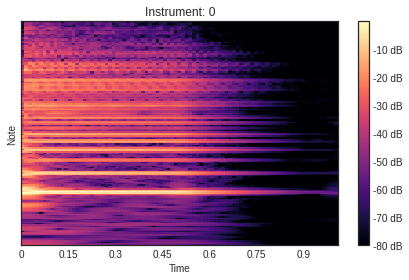

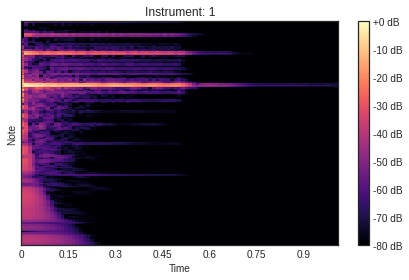

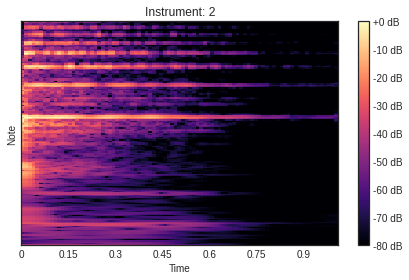

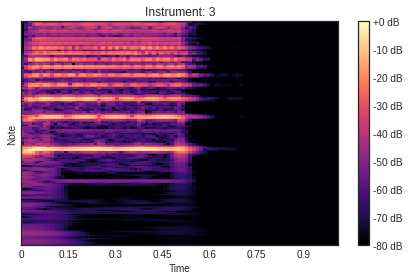

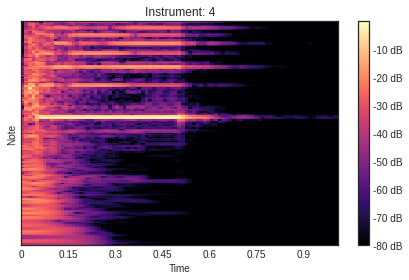

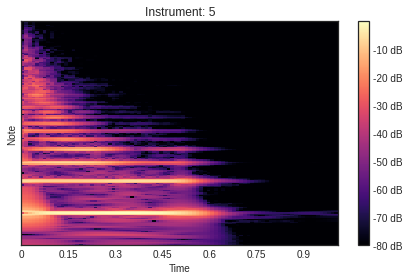

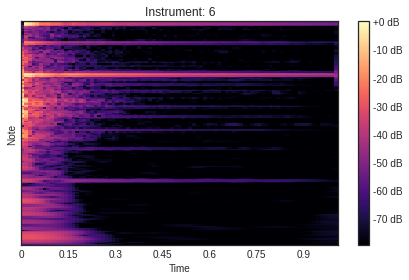

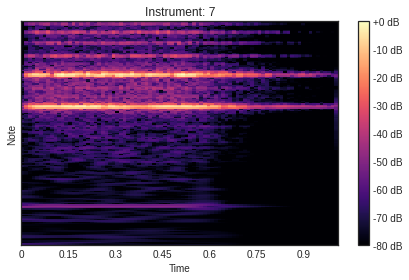

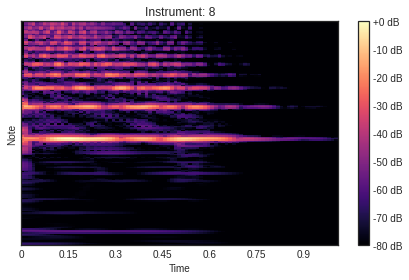

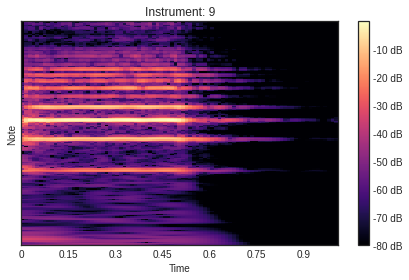

In [ ]:
# 바뀐 것이 어떻게 표현이 되는지 시각화로 나타내보자
# 0 부터 전체 악기 개수만큼 * num_notes, num_notes 
# 현재 instruments = 10, num_notes = 50
# 0부터 500까지 하는데 스텝을 50단위로

for i in range(0, len(instruments)*num_notes, num_notes):
    amp_db = librosa.amplitude_to_db(np.abs(audio_cqt[i]), ref=np.max) # 데시벨 형태로 바꿈
    librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis='cqt_note')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Instrument: {}'.format(inst[i])) # 제목
    plt.tight_layout()
    plt.show()

- 총 10개의 악기를 살펴보면 쪼금씩 형태가 다른 것을 확인할 수 있습니다.
- 이런 특성을 반영해 학습을 해보도록 합시다.

* 훈련 데이터와 실험 데이터를 분리

In [ ]:
# numpy로 변환
cqt_np = np.array(audio_cqt, np.float32)
inst_np = np.array(inst, np.int16)

print(cqt_np.shape, inst_np.shape)

(500, 168, 87) (500,)




*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [ ]:
cqt_np = cqt_np.reshape((500, 168 * 87))



*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(cqt_np)

MinMaxScaler(copy=True, feature_range=(0, 1))

* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(cqt_np, inst_np, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 14616)
(100, 14616)
(400,)
(100,)


- 기존 시계열 그대로 88200 -> 14616 으로 줄었습니다.

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.3


### Support Vector Machine

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel = 'linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.35


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.63


- 처음 만든 모델보다 성능이 많이 오른 것을 볼 수 있습니다.

## Constant-Q 특징을 이용한 딥러닝 오디오 분류

* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

### DNN 모델 구성

- 모델을 하나 구성해서 간단하게 사용을 해보겠습니다.

In [ ]:
# 케라스 유틸에서 분류
from keras.utils import to_categorical

cqt_np = np.array(audio_cqt, np.float32)
cqt_np = cqt_np.reshape((500, 168 * 87))
cqt_array = np.expand_dims(cqt_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(cqt_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 14616, 1)
(100, 14616, 1)
(400, 10)
(100, 10)


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense

def model_build():
    model = Sequential()

    input = Input(shape=(14616, ), name='input')
    output = Dense(512, activation='relu', name='hidden1')(input)
    output = Dense(256, activation='relu', name='hidden2')(output)
    output = Dense(128, activation='relu', name='hidden3')(output)
    output = Dense(10, activation='softmax', name='output')(output)

    model = Model(inputs=[input], outputs=output)

    model.compile(optimizer='adam',
                  loss = 'categorical_crossentropy',
                  metrics=['acc'])
    
    return model

In [ ]:
model = model_build()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 14616)]           0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               7483904   
_________________________________________________________________
hidden2 (Dense)              (None, 256)               131328    
_________________________________________________________________
hidden3 (Dense)              (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 7,649,418
Trainable params: 7,649,418
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_x, train_y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 3s 190ms/step - loss: 2.2407 - acc: 0.1711 - val_loss: 2.1267 - val_acc: 0.2125
Epoch 2/30
3/3 [==============================] - 0s 25ms/step - loss: 1.7932 - acc: 0.4623 - val_loss: 1.8455 - val_acc: 0.3125
Epoch 3/30
3/3 [==============================] - 0s 27ms/step - loss: 1.4736 - acc: 0.5480 - val_loss: 2.1155 - val_acc: 0.3000
Epoch 4/30
3/3 [==============================] - 0s 24ms/step - loss: 1.2049 - acc: 0.6926 - val_loss: 2.3442 - val_acc: 0.3000
Epoch 5/30
3/3 [==============================] - 0s 23ms/step - loss: 0.9820 - acc: 0.7582 - val_loss: 2.4085 - val_acc: 0.3000
Epoch 6/30
3/3 [==============================] - 0s 23ms/step - loss: 0.7665 - acc: 0.8361 - val_loss: 2.5735 - val_acc: 0.2750
Epoch 7/30
3/3 [==============================] - 0s 25ms/step - loss: 0.6127 - acc: 0.8482 - val_loss: 2.8489 - val_acc: 0.3000
Epoch 8/30
3/3 [==============================] - 0s 24ms/step - loss: 0.4945 - acc: 0.8971 - va

- 성능이 잘 나오지 않았다 오버피팅이 된듯하다.

In [ ]:
def plot_history(history_dict):
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(14, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b--', label='train_loss')
    ax1.plot(epochs, val_loss, 'r:', label='val_loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    loss = history_dict['acc']
    val_loss = history_dict['val_acc']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, loss, 'b--', label='train_accuracy')
    ax2.plot(epochs, val_loss, 'r:', label='val_accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.grid()
    ax2.legend()

    plt.show()

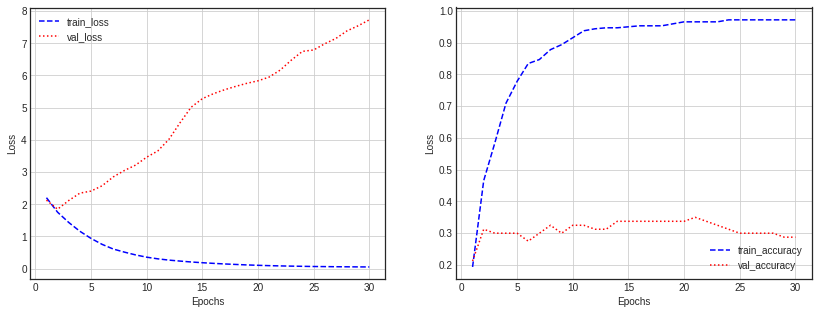

In [ ]:
plot_history(history.history)

- 오버피팅이 됬다.

In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 5ms/step - loss: 7.7530 - acc: 0.3700


[7.753008842468262, 0.3700000047683716]

- 성능이 좋지 않다. 47

### CNN 모델 구성



*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [ ]:
# 케라스 유틸에서 분류
from keras.utils import to_categorical

cqt_np = np.array(audio_cqt, np.float32)
cqt_array = np.expand_dims(cqt_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(cqt_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 168, 87, 1)
(100, 168, 87, 1)
(400, 10)
(100, 10)


In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten

def model_build():
    model = Sequential()

    input = Input(shape=(168, 87, 1))

    output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(input)
    output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

    output = Conv2D(256, 3, strides=1, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

    output = Conv2D(512, 3, strides=1, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

    output = Flatten()(output)
    output = Dense(512, activation='relu')(output)
    output = Dense(256, activation='relu')(output)
    output = Dense(128, activation='relu')(output)

    output = Dense(10, activation='softmax')(output)

    model = Model(inputs=[input], outputs=output)

    model.compile(optimizer='adam',
                  loss = 'categorical_crossentropy',
                  metrics=['acc'])
    
    return model

In [ ]:
model = model_build()
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 168, 87, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 168, 87, 128)      1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 84, 44, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 84, 44, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 42, 22, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 42, 22, 512)       1180160   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 11, 512)       0   

In [ ]:
history = model.fit(train_x, train_y, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 95s 28s/step - loss: 2.2547 - acc: 0.1764 - val_loss: 1.8734 - val_acc: 0.2500
Epoch 2/20
3/3 [==============================] - 89s 28s/step - loss: 1.7681 - acc: 0.3020 - val_loss: 1.6026 - val_acc: 0.4250
Epoch 3/20
3/3 [==============================] - 89s 28s/step - loss: 1.3827 - acc: 0.4797 - val_loss: 1.2609 - val_acc: 0.5375
Epoch 4/20
3/3 [==============================] - 91s 28s/step - loss: 0.9125 - acc: 0.6492 - val_loss: 1.1963 - val_acc: 0.6250
Epoch 5/20
3/3 [==============================] - 90s 28s/step - loss: 0.7236 - acc: 0.7406 - val_loss: 1.0000 - val_acc: 0.7000
Epoch 6/20
3/3 [==============================] - 90s 28s/step - loss: 0.6644 - acc: 0.8334 - val_loss: 1.3342 - val_acc: 0.7875
Epoch 7/20
3/3 [==============================] - 90s 28s/step - loss: 0.5608 - acc: 0.8596 - val_loss: 0.8620 - val_acc: 0.7375
Epoch 8/20
3/3 [==============================] - 90s 28s/step - loss: 0.4319 - acc: 0.8648 - val

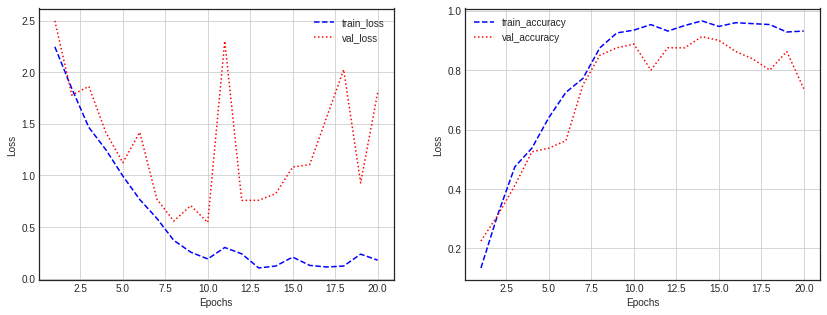

In [ ]:
plot_history(history.history)



*   훈련한 모델에 대한 정확도 평가
*   앞선 일반 분류 방법보다 정확도가 많이 오른 것을 확인할 수 있음



In [ ]:
# test data로 돌려보자
model.evaluate

<bound method Model.evaluate of <tensorflow.python.keras.engine.functional.Functional object at 0x7f5314624ed0>>

## MFCC를 이용한 머신러닝 오디오 분류

### 데이터 준비

* 데이터를 불러오고 MFCC(Mel-frequency cepstral coefficients)를 사용해 melspectrogram으로 변환

In [ ]:
# 데이터 불러오기
audio_mfcc = []
for y in audio:
    ret = librosa.feature.mfcc(y=y, sr=sr)
    audio_mfcc.append(ret)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9839 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9839 missing from current font.
  font.set_text(s, 0, flags=flags)


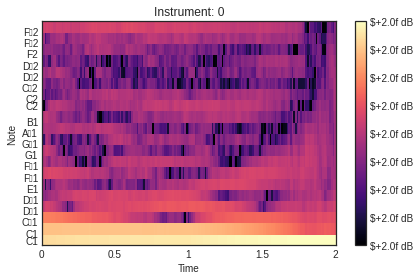

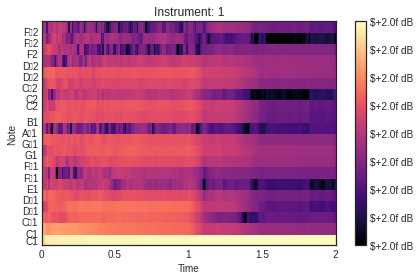

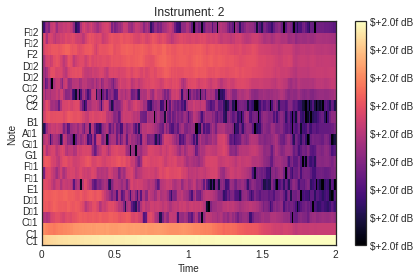

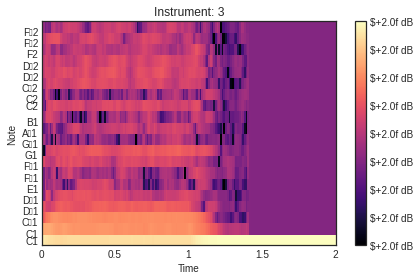

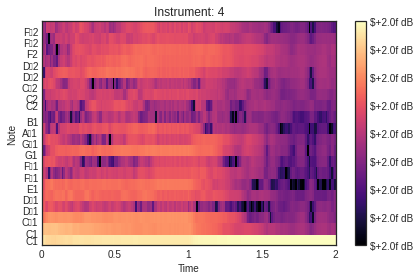

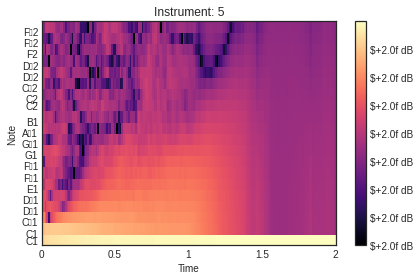

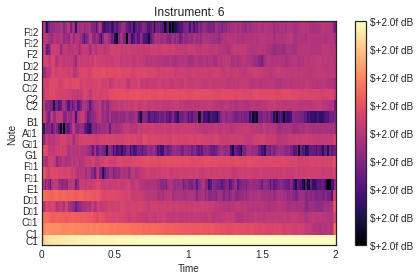

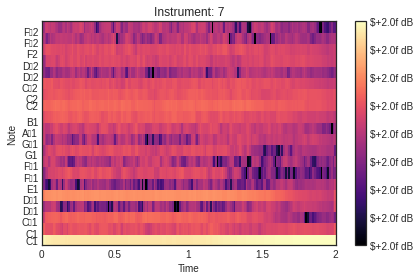

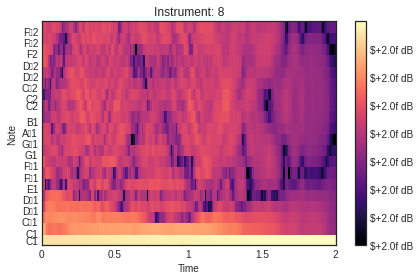

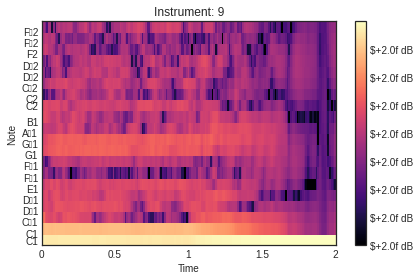

In [ ]:
# 시각화준비
for i in range(0, len(instruments)*num_notes, num_notes):
    amp_db = librosa.amplitude_to_db(np.abs(audio_mfcc[i]), ref=np.max)
    librosa.display.specshow(amp_db, sr=sr, x_axis='time', y_axis='cqt_note')
    plt.colorbar(format='$+2.0f dB')
    plt.title('Instrument: {}'.format(inst[i]))
    plt.tight_layout()
    plt.show()

- 악기별로 melspectrogram이 다른 것을 볼 수 있습니다.
- 이를 활용해 이미지와 비슷하게 오디오를 처리할 수 있을듯 합니다.

In [ ]:
# numpy로 변환
mfcc_np = np.array(audio_mfcc, np.float32)
ints_np = np.array(inst, np.int16)
# 데이터의 양이 줄어든 것을 확인할 수 있습니다.
print(mfcc_np.shape, inst_np.shape)

(500, 20, 173) (500,)




*   분류기에서 사용하기 위해 3차원 벡터를 2차원 벡터로 변환



In [ ]:
# reshape을 통해 더 작은 features를 사용합니다.
mfcc_np = mfcc_np.reshape((500, 20 * 173))



*   읽어온 데이터는 음량이나 범위가 다를 수 있음
*   min-max scaling을 통해 데이터의 범위를 조정함



In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(mfcc_np)

MinMaxScaler(copy=True, feature_range=(0, 1))

* 학습 데이터와 실험 데이터를 분리

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(mfcc_np, inst_np, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 3460)
(100, 3460)
(400,)
(100,)


- 3460으로 줄어든것을 확인할 수 있습니다.

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(train_x, train_y)
pred = LR.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.92


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Support Vector Machine

In [ ]:
from sklearn import svm

SVM = svm.SVC(kernel = 'linear')
SVM.fit(train_x, train_y)
pred = SVM.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.95


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(train_x, train_y)
pred = DT.predict(test_x)
acc = accuracy_score(pred, test_y)
print(acc)

0.86


- feature 수가 줄어드니까 성능이 좋아지는 것을 확인할 수 있습니다.
- 얼마나 중요한 feature 나타내느냐가 성능에 많은 영향을 미치는 것 같습니다.

## MFCC를 이용한 딥러닝 오디오 분류

* 앞선 문제점을 극복하기 위해 오디오 데이터에 특화된 분류 방법 필요
* 오디오 데이터를 spectrogram으로 가공하면 파장과 세기를 가진 이미지(2차원 배열)가 생성
* 이 spectrogram을 CNN 이미지 분류를 통해 각 악기 소리를 분류

### DNN 모델 구성

In [ ]:
# 케라스 유틸에서 분류
from keras.utils import to_categorical

mfcc_np = np.array(audio_mfcc, np.float32)
mfcc_np = mfcc_np.reshape((500, 20 * 173))
mfcc_array = np.expand_dims(mfcc_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(mfcc_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 3460, 1)
(100, 3460, 1)
(400, 10)
(100, 10)


In [ ]:
from keras.models import Sequential, Model
from keras.layers import Input, Dense

def model_build():
    model = Sequential()

    input = Input(shape=(3460, ), name='input')
    output = Dense(512, activation='relu', name='hidden1')(input)
    output = Dense(256, activation='relu', name='hidden2')(output)
    output = Dense(128, activation='relu', name='hidden3')(output)
    output = Dense(10, activation='softmax', name='output')(output)

    model = Model(inputs=[input], outputs=output)

    model.compile(optimizer='adam',
                  loss = 'categorical_crossentropy',
                  metrics=['acc'])
    
    return model

In [ ]:
model = model_build()
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 3460)]            0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               1772032   
_________________________________________________________________
hidden2 (Dense)              (None, 256)               131328    
_________________________________________________________________
hidden3 (Dense)              (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,937,546
Trainable params: 1,937,546
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_x, train_y, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
3/3 [==============================] - 1s 94ms/step - loss: 222.2464 - acc: 0.0467 - val_loss: 235.1350 - val_acc: 0.1250
Epoch 2/30
3/3 [==============================] - 0s 20ms/step - loss: 209.2551 - acc: 0.1625 - val_loss: 141.7202 - val_acc: 0.2000
Epoch 3/30
3/3 [==============================] - 0s 18ms/step - loss: 122.8353 - acc: 0.2773 - val_loss: 86.3083 - val_acc: 0.2250
Epoch 4/30
3/3 [==============================] - 0s 18ms/step - loss: 80.1997 - acc: 0.2104 - val_loss: 61.4537 - val_acc: 0.2875
Epoch 5/30
3/3 [==============================] - 0s 19ms/step - loss: 50.6662 - acc: 0.4516 - val_loss: 71.5168 - val_acc: 0.2500
Epoch 6/30
3/3 [==============================] - 0s 18ms/step - loss: 46.8826 - acc: 0.4047 - val_loss: 36.1833 - val_acc: 0.3875
Epoch 7/30
3/3 [==============================] - 0s 19ms/step - loss: 23.2542 - acc: 0.5051 - val_loss: 18.3998 - val_acc: 0.4875
Epoch 8/30
3/3 [==============================] - 0s 22ms/step - loss: 10.3886

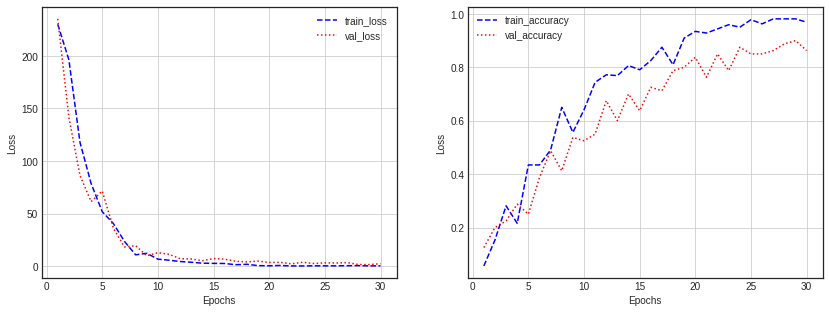

In [ ]:
plot_history(history.history)

In [ ]:
model.evaluate(test_x, test_y)

4/4 [==============================] - 0s 4ms/step - loss: 1.6428 - acc: 0.9200


[1.6428344249725342, 0.9200000166893005]

### CNN 모델 구성



*   spectrogram을 분류할 CNN 모델 구성
*   모델의 구성은 여타 이미지 분류 모델과 다르지 않음
*   spectrogram은 1차원 이미지로 간주


In [ ]:
# 케라스 유틸에서 분류
from keras.utils import to_categorical

mfcc_np = np.array(audio_mfcc, np.float32)
mfcc_array = np.expand_dims(mfcc_np, -1)
inst_cat = to_categorical(inst_np)

train_x, test_x, train_y, test_y = train_test_split(mfcc_array, inst_cat, test_size=0.2)

print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)

(400, 20, 173, 1)
(100, 20, 173, 1)
(400, 10)
(100, 10)


In [ ]:
from keras.layers import Conv2D, MaxPool2D, Flatten

def model_build():
    model = Sequential()

    input = Input(shape=(20, 173, 1))

    output = Conv2D(128, 3, strides=1, padding='same', activation='relu')(input)
    output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

    output = Conv2D(256, 3, strides=1, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

    output = Conv2D(512, 3, strides=1, padding='same', activation='relu')(output)
    output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

    output = Flatten()(output)
    output = Dense(512, activation='relu')(output)
    output = Dense(256, activation='relu')(output)
    output = Dense(128, activation='relu')(output)

    output = Dense(10, activation='softmax')(output)

    model = Model(inputs=[input], outputs=output)

    model.compile(optimizer='adam',
                  loss = 'categorical_crossentropy',
                  metrics=['acc'])
    
    return model

In [ ]:
model = model_build()
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 20, 173, 1)]      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 173, 128)      1280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 10, 87, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 87, 256)       295168    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 44, 256)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 44, 512)        1180160   
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 22, 512)        0   

In [ ]:
history = model.fit(train_x, train_y, epochs=20, batch_size=128, validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 5s 1s/step - loss: 65.5327 - acc: 0.1064 - val_loss: 79.1950 - val_acc: 0.1375
Epoch 2/20
3/3 [==============================] - 0s 93ms/step - loss: 49.7898 - acc: 0.1088 - val_loss: 5.7880 - val_acc: 0.0750
Epoch 3/20
3/3 [==============================] - 0s 89ms/step - loss: 4.0834 - acc: 0.1113 - val_loss: 2.3265 - val_acc: 0.1000
Epoch 4/20
3/3 [==============================] - 0s 86ms/step - loss: 2.3137 - acc: 0.0969 - val_loss: 2.2304 - val_acc: 0.2750
Epoch 5/20
3/3 [==============================] - 0s 88ms/step - loss: 2.2140 - acc: 0.2445 - val_loss: 2.2005 - val_acc: 0.1500
Epoch 6/20
3/3 [==============================] - 0s 88ms/step - loss: 2.1101 - acc: 0.2238 - val_loss: 1.9125 - val_acc: 0.2625
Epoch 7/20
3/3 [==============================] - 0s 87ms/step - loss: 1.8581 - acc: 0.3418 - val_loss: 1.5579 - val_acc: 0.3875
Epoch 8/20
3/3 [==============================] - 0s 85ms/step - loss: 1.7087 - acc: 0.3459 - va

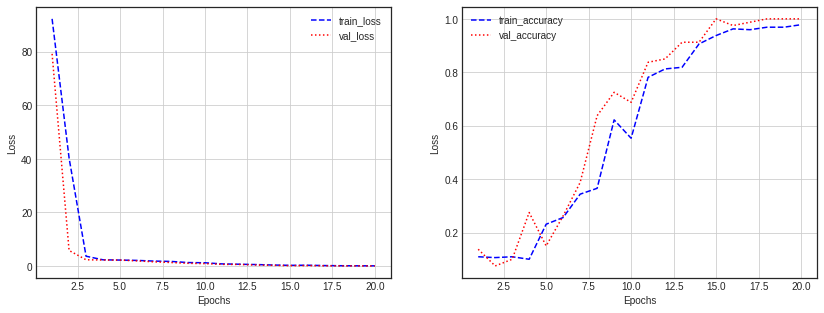

In [ ]:
plot_history(history.history)

In [ ]:
# test data로 돌려보자
model.evaluate(test_x, test_y)

4/4 [==============================] - 1s 43ms/step - loss: 0.0685 - acc: 0.9700


[0.06850288063287735, 0.9700000286102295]

- 엄청 큰 길이의 오디오를 그대로 쓰는 것은 비효율적이다.
- 중요한 feature만 선택해서 훈련시키는 것이 좋다.

In [80]:
!pip freeze > requirements.txt